# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [53]:
# Importing needed libraries for data:
import numpy as np
import pandas as pd

# Importing data viz libraries:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# hypothesis testing, modeling and machine learning 
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics


In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# What the dataset looks like?
pd.set_option('display.max_columns', 100) # to be able to see all columns
print(websites.shape)
websites.head()

(1781, 21)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


**My comments:** 
* This dataset is about websites classification (type) depending on:
    - technical websites info (url, charset)
    - their server (country, statepro, regdate and updates, port, ips, queries times)
    - their apps (numbers, sources, bytes, packets), etc...
* This dataset contains:
    - 1781 registers (rows)
    - 22 variables (columns)

In [4]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

**My comments:** 
- Main variables types are numeric: most of them are int, except CONTENT_LENGTH and DNS_QUERY_TIMES that are float.
- Some of them are objects: URL, CHARSET, SERVER and the 4 WHOIS_ variables: COUNTRY, STATEPRO, REGDATE and UPDATED_DATE.

In [5]:
# Which columns contain the features of the websites?
# Which column contains the feature we will predict? 
websites.nunique()

URL                          1781
URL_LENGTH                    142
NUMBER_SPECIAL_CHARACTERS      31
CHARSET                         9
SERVER                        239
CONTENT_LENGTH                637
WHOIS_COUNTRY                  49
WHOIS_STATEPRO                182
WHOIS_REGDATE                 891
WHOIS_UPDATED_DATE            594
TCP_CONVERSATION_EXCHANGE     103
DIST_REMOTE_TCP_PORT           66
REMOTE_IPS                     18
APP_BYTES                     825
SOURCE_APP_PACKETS            113
REMOTE_APP_PACKETS            116
SOURCE_APP_BYTES              885
REMOTE_APP_BYTES              822
APP_PACKETS                   113
DNS_QUERY_TIMES                10
Type                            2
dtype: int64

**My comments:** 
- Type is the feature we will predict (only 2 classes of websites type)
- All the other variables which contain the features of the websites
- URL values are all uniques: this variable looks like an ID and should not give many information or value as data

In [6]:
# checking missing values
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

**My comments:** 
- CONTENT_LENGTH variable has 812 missing values. If we have a quick look on the other variables (below) for missing values in this column, it's hard to see any pattern related to having or not missing values. 

In [7]:
missing_content_length = websites.loc[websites.CONTENT_LENGTH.isnull()]
missing_content_length.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,6,9,894,11,13,838,894,11,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,1,62,146,2,2.0,1
10,B0_1013,20,6,utf-8,Apache,NaN,US,Kansas,14/09/2007 0:00,9/09/2015 0:00,0,0,0,0,0,0,0,0,0,0.0,0
20,B0_161,22,6,utf-8,openresty/1.11.2.1,NaN,US,CA,3/07/1999 0:00,7/08/2015 0:00,39,29,6,3833,43,42,22495,4125,43,4.0,0


In [8]:
# What is the code standing for benign vs malicious websites?
print(websites.Type.value_counts())
zeros = websites.loc[websites.Type == 0]
ones = websites.loc[websites.Type == 1]

0    1565
1     216
Name: Type, dtype: int64


**My comments:** 
- Only considering the websites type distribution, I would think there are more benign that malicious websites, but this is not enough to confirm

In [9]:
zeros.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,6,9,894,11,13,838,894,11,0.0,0


In [10]:
ones.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,0,0,0,0,2,1,62,146,2,2.0,1
15,M0_71,21,7,ISO-8859-1,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,UK,None,16/07/2000 0:00,4/07/2015 0:00,7,0,1,717,11,10,1960,1011,11,4.0,1
16,M0_97,21,7,iso-8859-1,nginx,686.0,RU,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,6,0,2,603,8,9,1580,745,8,2.0,1


**My comments:** 
- Just with a quick look on data, it's complicated to know which ones are the good or the bad ones if you do not know about technical information, but there is something easy to detect here is that in the URL column the data are not usual URL but coded URL and what a coincidence but the 5 first rows of zeros start with B like Benign and the 5 first rows of ones with M like Malicious. This looks like a good way to identify and much more considering our previous thought but before confirming we need to be 100% sure and check if this could apply to the whole dataset.

In [11]:
websites['check'] = websites['URL'].astype(str).str.get(0)
websites.check.value_counts()

B    1565
M     216
Name: check, dtype: int64

In [12]:
zeros = websites.loc[websites.Type == 0]
zeros.check.value_counts()

B    1565
Name: check, dtype: int64

In [13]:
ones = websites.loc[websites.Type == 1]
ones.check.value_counts()

M    216
Name: check, dtype: int64

**My comments:** 
- Now we can confirm: '0' is Benign and '1' is Malicious

In [14]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

**My comments:** 
- All  ordinal values are set into numeric type columns (int or float)
- The only columns we could transform would be the 2 Date columns, but as for the moment we are not sure that we are going to use them, let's go directly to the next point.

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

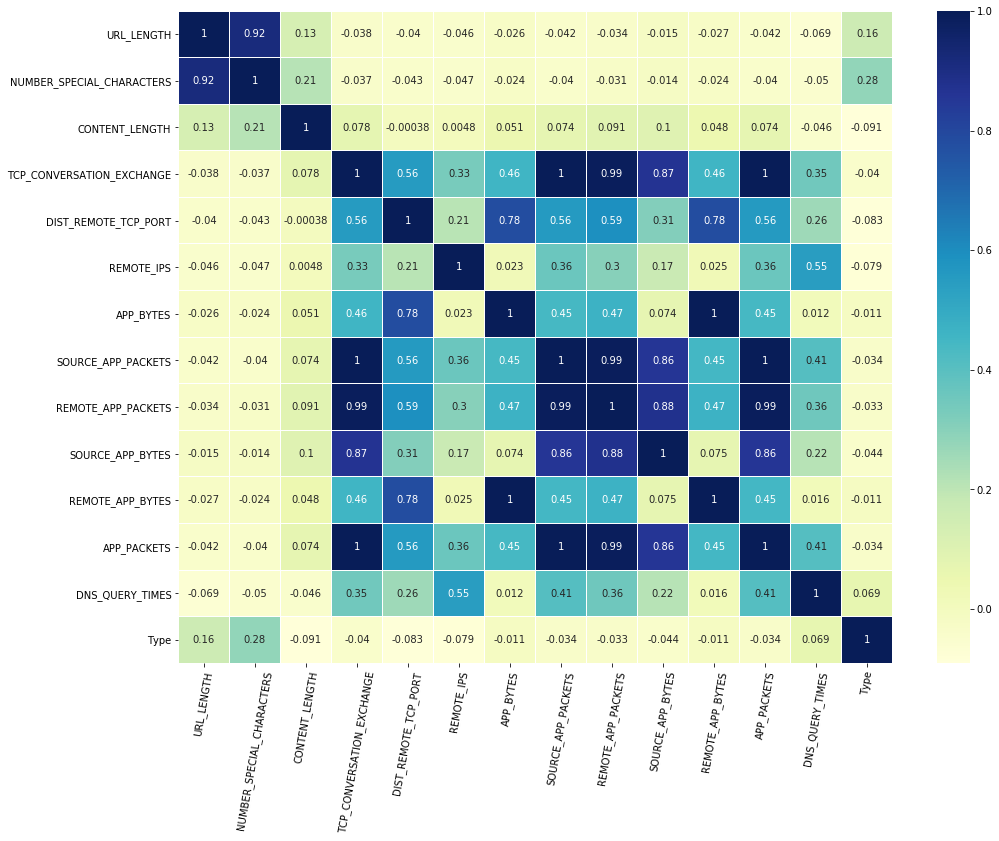

In [15]:
# Creating a heatmap using the standard correlation (considering only numeric)
# as we have to print again in the next steps, I just re-factorize my coding and prefer to build a function for that
def plot_heatmap_numeric(df):
    plt.figure(figsize=(16,12))
    plt.xticks(rotation=80)
    return sns.heatmap(df.corr(),linewidths=.1,cmap='YlGnBu', annot=True)

plot_heatmap_numeric(websites)

**My comments:**
- On one side, we can see that there is a high colinearity between source and remote characteristics: APP packets and bytes.
I suggest to keep the source ones and remove the remote ones as if we look their correlation with type they seem to be higher.
- On another side, there is another colinearity between URL length and number of special characters, nevertheless as both variable get the 2 highest correlations with type and neither both are correlated with the other technical data, I prefer not to remove them from the explicative features selection.

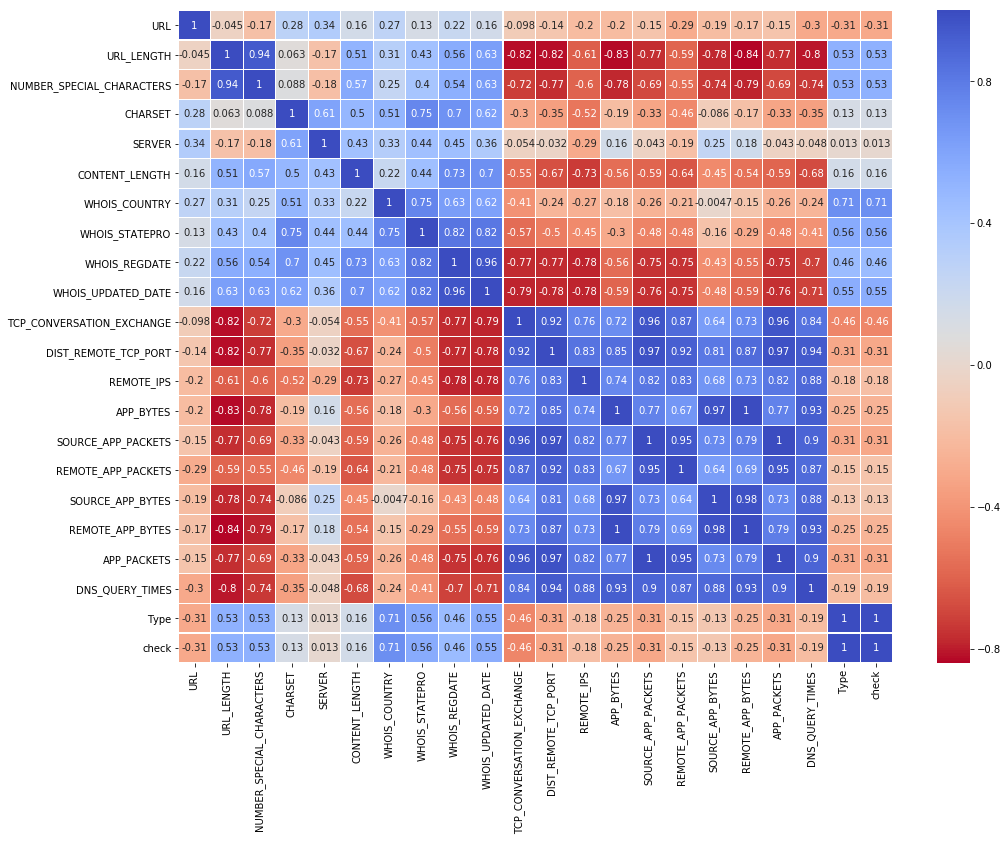

In [16]:
# now if we want to consider all variables for the matrix correlation (including categorical ones)
# building a p_values_matrix with crosstab to see all variables correlations (not only the numerical ones)
# as we have to print again in the next steps, I just re-factorize my coding and prefer to build a function for that

def plot_heatmap(df):
    var = df.columns
    p_values_matrix=pd.DataFrame(columns=var,index=var)
    for r in var:      # for each var in row
        for c in var:  # for each var in column
            p_values_matrix[r][c] = chi2_contingency(pd.crosstab(df[r], df[c]))[1] # 1 is p-value test result
            
    # plotting this contigency chi2 p-values with heatmap:         
    p_values_labencod = p_values_matrix.apply(preprocessing.LabelEncoder().fit_transform)
    # Creating a heatmap using the p-value matrix for the pairwise Chi-Square test of independence.
    plt.figure(figsize=(16,12))
    plt.xticks(rotation=80)    
    # cmap_r for negative (r) Vs positive (b)
    return sns.heatmap(p_values_labencod.corr(),linewidths=.1,cmap='coolwarm_r', annot=True) 

plot_heatmap(websites)

**My comments:** 
- If we plot all variables correlations, we can clearly see that the websites and servers technical information show a positive correlation among themselves and a negative one respecting to the TCP and APPs specific information.
- The same occurs on the other side: TCP and APPs specific information show a positive correlation among themselves and a negative one respecting to the websites and servers technical information.
- Then, we can also see that the websites and servers technical information have a positive correlation with the website type (except URL code, but that makes sense because it does not give any information) while TCP and APPs specific information get a negative relationship with the websites type.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [50]:
# The first column I will remove is URL because as we see the data does not bring any information (like ID with label classification M/B)
# I remove also my check column
websites.drop(columns=['URL','check'], inplace=True, axis=1)
# Then I will remove the remote APP packets and bytes
websites_clean = websites.copy()
websites_clean.drop(columns=['REMOTE_APP_PACKETS','REMOTE_APP_BYTES'], inplace=True, axis=1)
websites_clean.columns

KeyError: "['URL'] not found in axis"

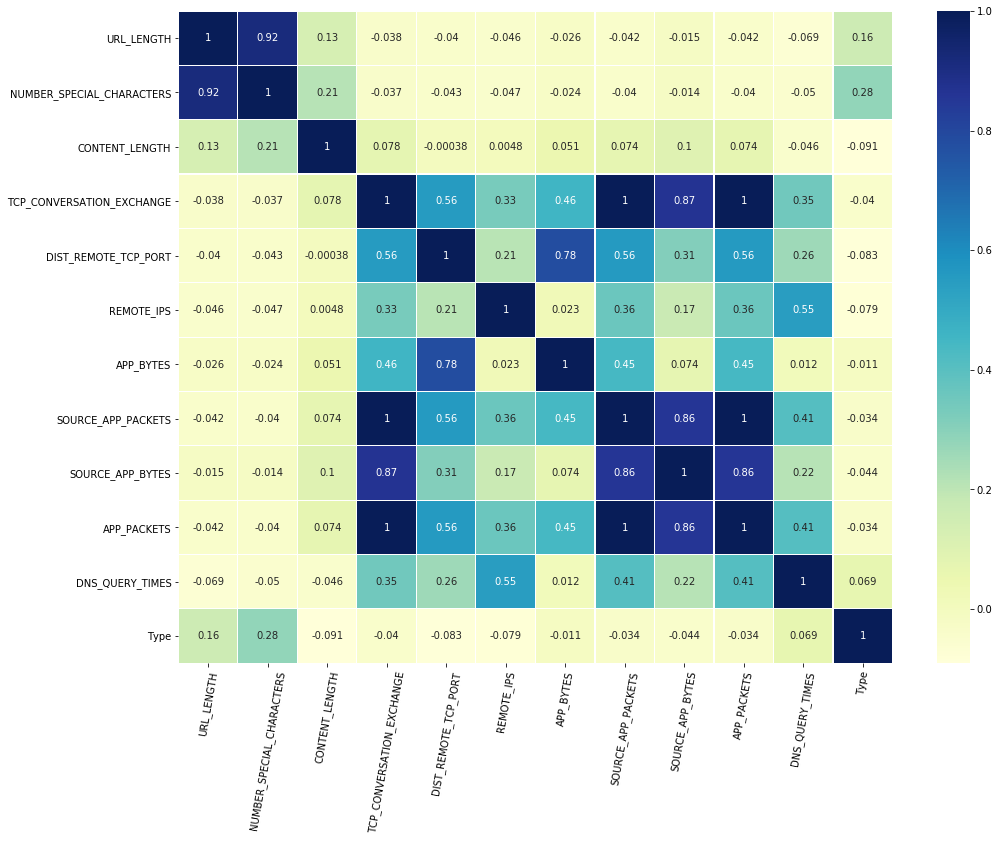

In [18]:
# Printing heatmap again
plot_heatmap_numeric(websites_clean)

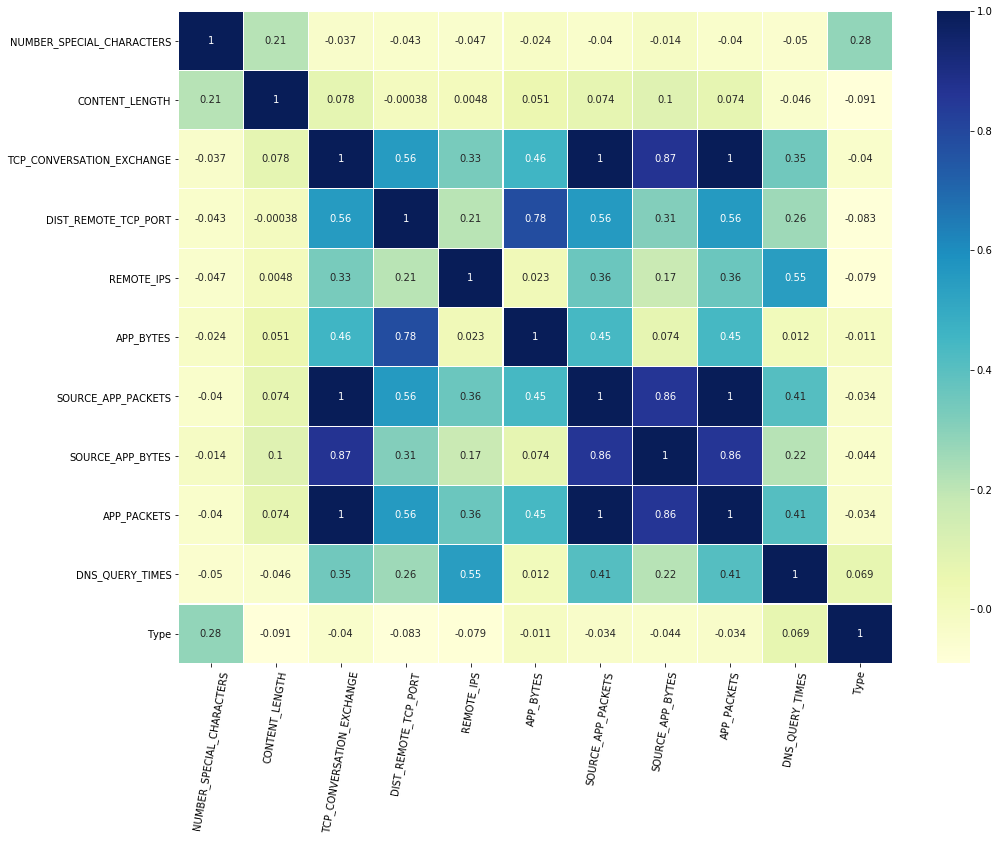

In [19]:
# Now I will remove is URL LENGTH due to its high colinearity with NB SPECIAL CHARACTERS 
# Also because we have CONTENT LENGTH in parallel
websites_clean.drop(columns=['URL_LENGTH'], inplace=True, axis=1)
# Printing heatmap again
plot_heatmap_numeric(websites_clean)

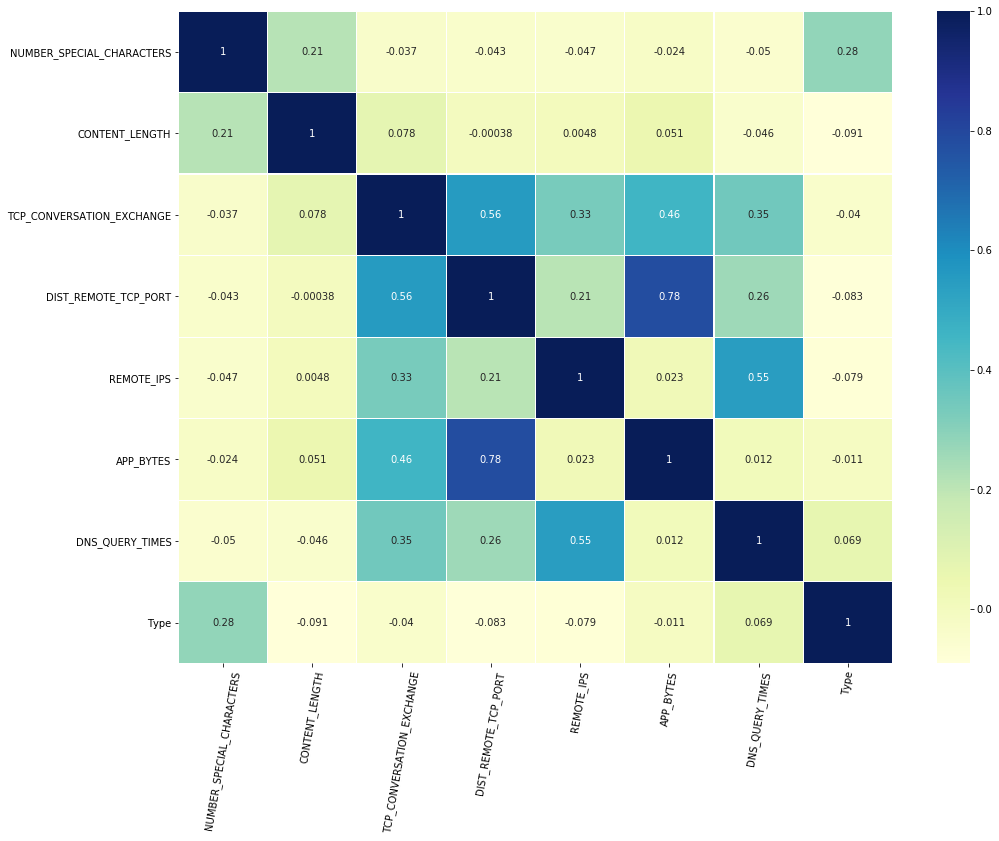

In [20]:
# Now I will also remove SOURCE APP packets and bytes and also APP_PACKETS
websites_clean.drop(columns=['SOURCE_APP_PACKETS','SOURCE_APP_BYTES','APP_PACKETS'], inplace=True, axis=1)
# Printing heatmap again
plot_heatmap_numeric(websites_clean)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [21]:
# done before

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [22]:
# evaluating the ratio missing value
print(round(len(missing_content_length)*100/len(websites)),2)
# calculating in terms of data cells loss in case we drop na row or content lenght column
print('\n dropping content lenght column:',len(websites),
      '\n dropping rows with NaN (original dataset):',len(missing_content_length)*websites.shape[1],
      '\n dropping rows with NaN (clean dataset):',len(missing_content_length)*websites_clean.shape[1])

46 2

 dropping content lenght column: 1781 
 dropping rows with NaN (original dataset): 17052 
 dropping rows with NaN (clean dataset): 12180


In [23]:
# I think it's better to loose 1781 data than 12-17k data so I decide to remove only the column with NaN

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [24]:
websites_clean.drop(columns='CONTENT_LENGTH',axis=1,inplace=True)
# Examine missing values in each column
websites_clean.isna().sum()

NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
DNS_QUERY_TIMES              1
Type                         0
check                        0
dtype: int64

In [25]:
# for the 2 NaN remaining, yes we can drop nan rows:
websites_clean.dropna(inplace=True)
websites_clean.isna().sum()

NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
DNS_QUERY_TIMES              0
Type                         0
check                        0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [26]:
# checking
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [27]:
# cleaning using a dictionary with wrong values as keys and corrections as values
# DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
cleaning_country = {"United Kingdom":"UK", "GB":"UK","[u'GB'; u'UK']":"UK","Cyprus":"CY"}
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(to_replace = cleaning_country).apply(lambda x : x.strip().upper())
# checking correction
websites.WHOIS_COUNTRY.unique()

array(['NONE', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

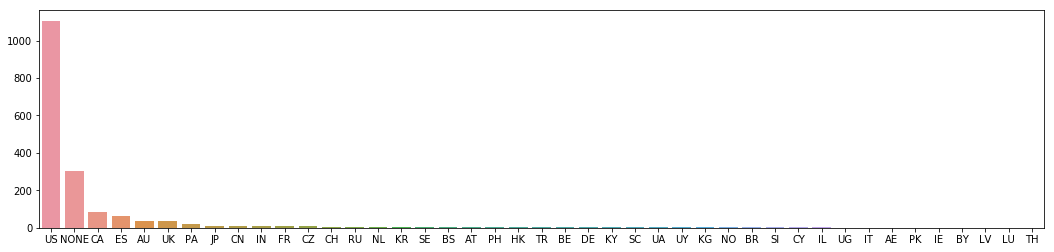

In [28]:
# checkin countries distribution
countries = websites.WHOIS_COUNTRY.value_counts()
plt.figure(figsize=(18,4))
sns.barplot(x=countries.index,
            y=countries.values)

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [29]:
# Your code here
top10 = countries.head(11) # for me, top 10 means top 10 countries. None is not a country
top10

US      1106
NONE     306
CA        84
ES        63
AU        35
UK        35
PA        21
JP        11
CN        10
IN        10
FR         9
Name: WHOIS_COUNTRY, dtype: int64

In [30]:
def keeping_only_top10(country):
    if country not in top10:
        country = 'OTHER'
    return country
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(keeping_only_top10)
websites.WHOIS_COUNTRY.unique() # checking

array(['NONE', 'US', 'OTHER', 'UK', 'AU', 'CA', 'PA', 'IN', 'FR', 'JP',
       'CN', 'ES'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [31]:
# Your code here
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace= True, axis=1)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [32]:
# Your code here
websites.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
check                         object
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [33]:
# already done in the first step

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [34]:
# cleaning CHARSET column
websites.CHARSET.unique()
websites.CHARSET = websites.CHARSET.apply(lambda x: x.upper())
cleaning_charset = {'ISO-8859':'ISO-8859-1','WINDOWS-1251':'WINDOWS-1252'}
websites['CHARSET'] = websites['CHARSET'].replace(to_replace = cleaning_charset).apply(lambda x : x.upper())
# checking correction
websites.CHARSET.value_counts()

UTF-8           1055
ISO-8859-1       562
US-ASCII         155
NONE               7
WINDOWS-1252       2
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [35]:
# cleaning SERVER column
websites['SERVER'].value_counts()
main_servers = ['APACHE','MICROSOFT','NGINX','AMAZON','NONE','CLOUDFLARE','YOUTUBEFRONTEND','ATS','VARNISH','LITESPEED']

def cleaning_server(server):
    server = str(server).upper() 
    for s in main_servers:
        if s in server: 
            server = s
    if server not in main_servers: 
        server = 'OTHER'
    return server

websites['SERVER']= websites['SERVER'].apply(cleaning_server)
websites['SERVER'].value_counts()

APACHE             643
NGINX              436
OTHER              238
MICROSOFT          198
NONE               175
YOUTUBEFRONTEND     42
ATS                 32
VARNISH              7
LITESPEED            6
AMAZON               4
Name: SERVER, dtype: int64

![Think Hard](../think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [36]:
# I think maybe we could remain also YOUTUBEFRONTEND and ATS but let's summarize
only4servers = ['APACHE','MICROSOFT','NGINX','OTHER']
def summarize_server(server):
    if server not in only4servers: 
        server = 'OTHER'
    return server

websites['SERVER']= websites['SERVER'].apply(summarize_server)

In [37]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

APACHE       643
OTHER        504
NGINX        436
MICROSOFT    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [38]:
# Your code here
website_dummy = pd.get_dummies(websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [39]:
# Your code here
website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_NONE,CHARSET_US-ASCII,CHARSET_UTF-8,CHARSET_WINDOWS-1252,SERVER_MICROSOFT,SERVER_NGINX,SERVER_OTHER,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_NONE,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,check_M
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [52]:
# from sklearn.model_selection import train_test_split (at the beginning of the lab)
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [41]:
# Your code here:
lr = LogisticRegression(random_state=0, solver='lbfgs',
                          multi_class='multinomial', max_iter=1000)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [42]:
# Your code here:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [43]:
# Your code here:



What are your thoughts on the performance of the model? Write your conclusions below.

In [44]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [45]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [46]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [47]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [48]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [49]:
# Your code here